# Sequential Model
- 일상 속에서 가장 흔하게 볼 수 있는 데이터이다.
- 강의, 손 동작, 말 하는 것 등등
- sequential 데이터를 다루기 힘든 이유 : 우리가 얻고 싶은 것은 하나의 라벨일 때가 많은데, sequentail data 정의상 길이가 언제 끝날지 모르기 때문이다. 내가 받아들여야 하는 차원을 알 수가 없다.

## Naive sequene model
- 이전 데이터가 들어왔을 때 다음 데이터를 찾아보는 것.
- 뒤로 갈 수록 고려해야할 데이터의 양이 점점 늘어난다.
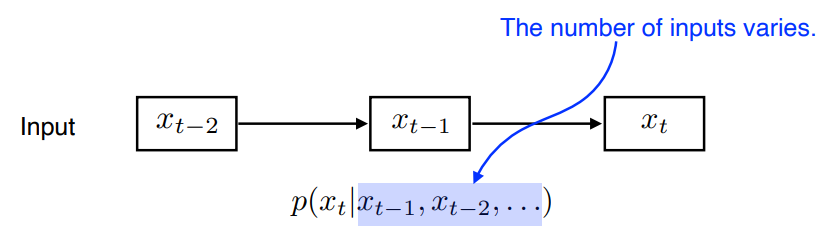


- 그렇기 때문에 과거의 모든 데이터를 보지 않고 과거의 일부만 고려할 수 있다.
- Autoregressive model
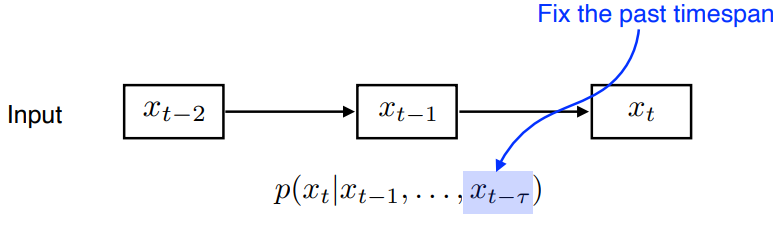


- Markov model(first-order autoregressive model)
- 많은 정보를 버릴 수 밖에 없다.
- joint distribution을 쉽게 표현할 수 있는 장점이 있다.
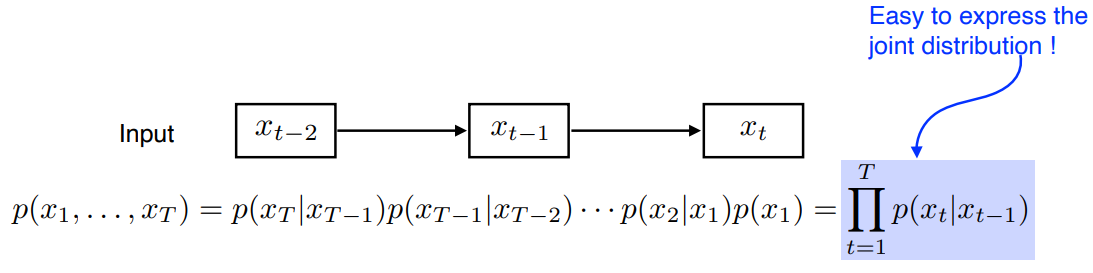


- Latent autoregressive model
- 중간에 히든 스테이트가 있어서 과거의 정보를 요약하여 다음 타임 스텝에서 참고한다.
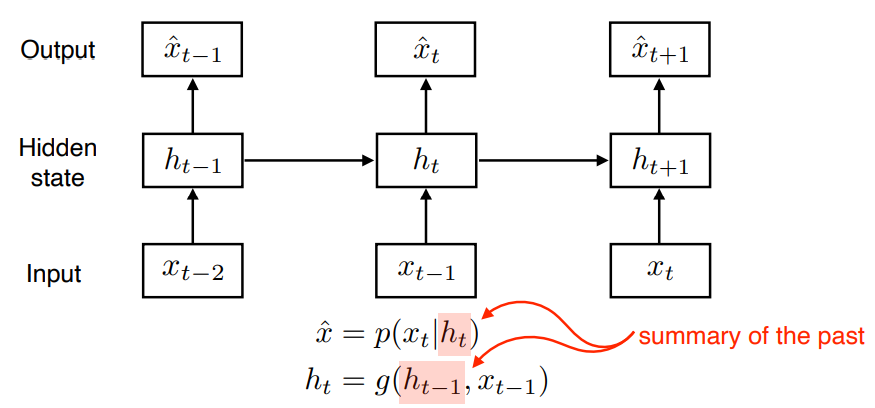

# Recurrent Neural Network
- mlp와 다른 점은 자기 자신으로 돌아오는 구조가 있다.

- $h_t$는 $X_t$에만 의존하지 않는다.
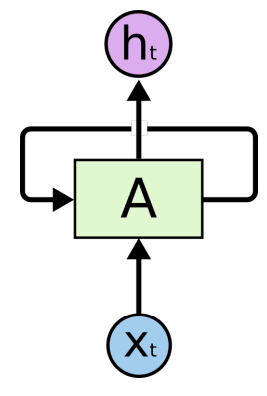
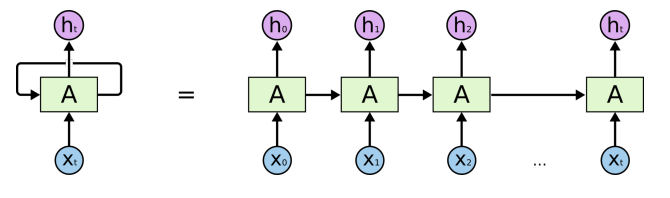

- **short**-term dependencies
- 과거에 얻어진 정보들이 다 취합되어 미래에서 고려해야하는데
- rnn 자체는 하나의 고정된 규칙으로 과거의 정보가 미래까지 살아남기 힘들다.
- 가까운 과거는 현재 잘 고려가 되지만, 먼 과거는 고려가 잘 되지 않는다.
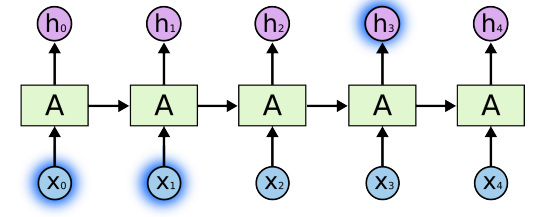

- **Long**-term dependencies
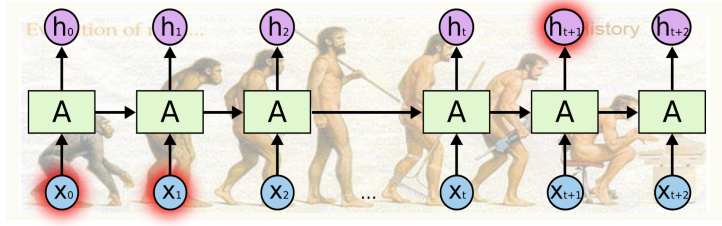

- 만약 activation function이 sigmoid라면 뒤로 갈수록 기울기 소실이 심해져 정보가 점점 없어진다.
- relu라면 값이 점점 커져 학습이 과부하가 된다.
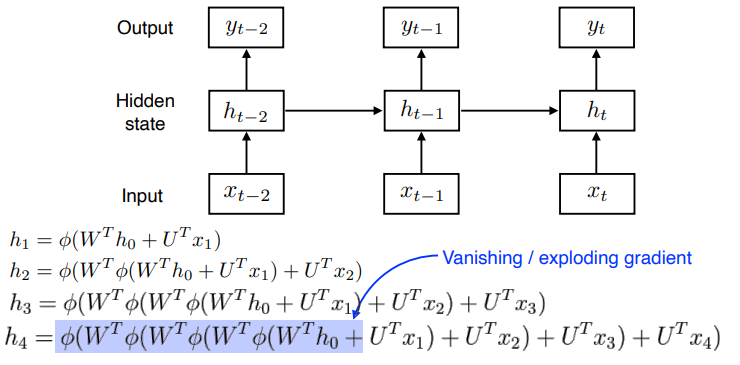

# Long Short Term Memory (LSTM)
- 기존의 바닐라 RNN의 단점을 보완한 모델이다.
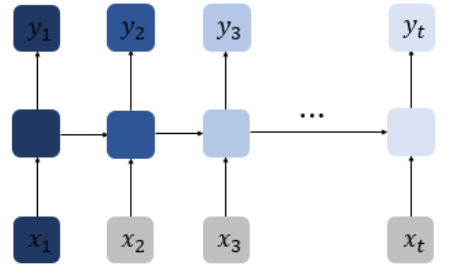
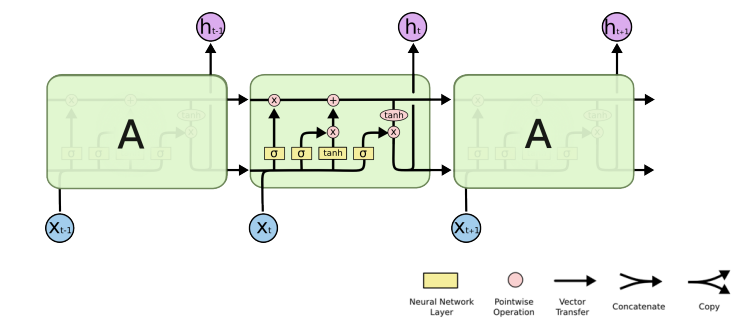
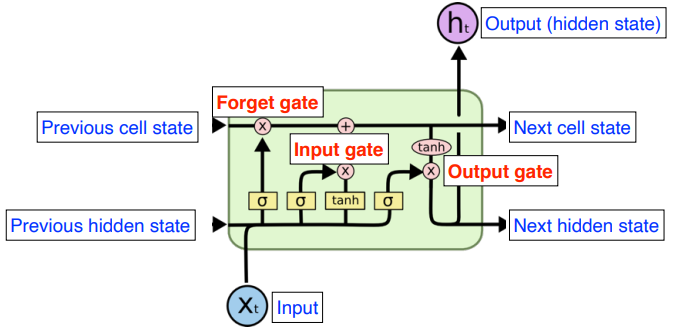

- $X_t$ : 입력(input)
- $h_t$ : 출력(output)
- cell state : 내부에서만 동작한다. 지금까지의 타임스텝 정보를 취합하여 요약하는 역할을 한다.

- **Core idea**
    - cell state(셀 상태) : 어떤 정보가 유용한지 잘 판단하여 다음 게이트로 넘겨주는 역할을 한다.
    
    
## Forget Gate
- Decide which information to **throw** away
- 기억을 삭제하기 위한 게이트.
- sigmoid를 통과하여 0~1 값을 가지는데, 0에 가까울수록 정보가 많이 삭제된 것이고 1에 가까울수록 정보를 온전히 기억한다.
- 이 값을 셀 상태 업데이트에 사용한다.

> $f_t = \sigma(W_f\cdot[h_{t-1},x_t] + b_f)$
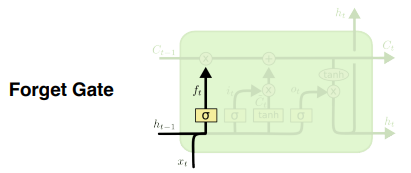

## Input Gate
- Decide which information to **store** in the cell state
- 현재 정보를 기억하기 위한 게이트.
- sigmoid를 통과한 것과 tanh를 통과한 것을 곱하여 셀 상태 업데이트에 사용한다.

> $i_t = \sigma(W_t\cdot[h_{t-1}, x_t] + b_i)$

> $\tilde{C} = tanh(W_C\cdot[h_{t-1}, x_t] + b_C)$
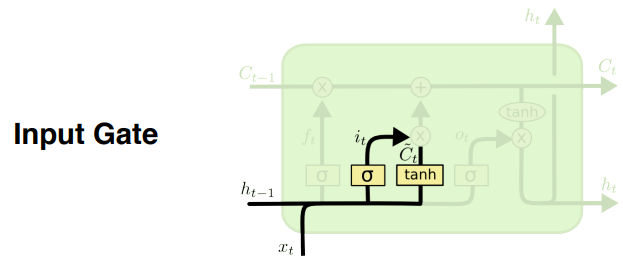

## Update cell
- Update the cell state
- 삭제 게이트는 이전 시점의 입력을 얼마나 반영할지를 의미하고, 입력 게이트는 현재 시점의 입력을 얼마나 반영할지를 결정한다.

> $i_t = \sigma(W_t\cdot[h_{t-1}, x_t] + b_i)$

> $C_t = f_t*C_{t-1} + i_t * \tilde{C}_t$
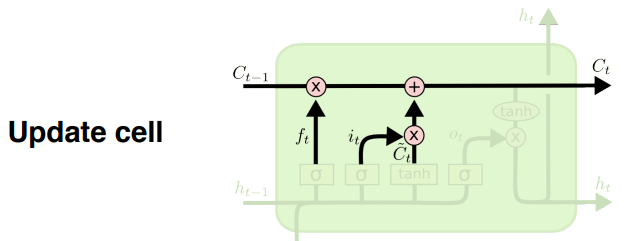

## Ouput Gate
- make output using the updated cell state

> $o_t = \sigma(W_o[h_{t-1}, x_t] + b_o)$

> $h_t = o_t*tanh(C_t)$
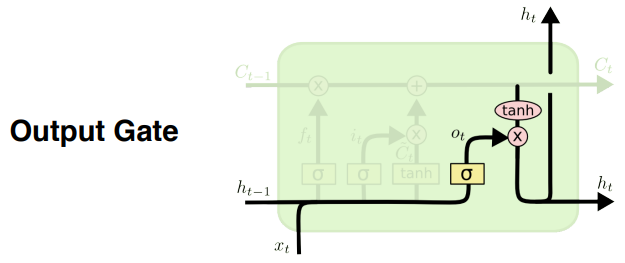

# Gated Recurrent Unit(GRU)
- Simple rarchitecture with two gates(**reset gate** and **update gate**).


- No **cell state**, just **hidden state**.


- GRU를 사용한 경우 성능이 올라간 경우가 있다.

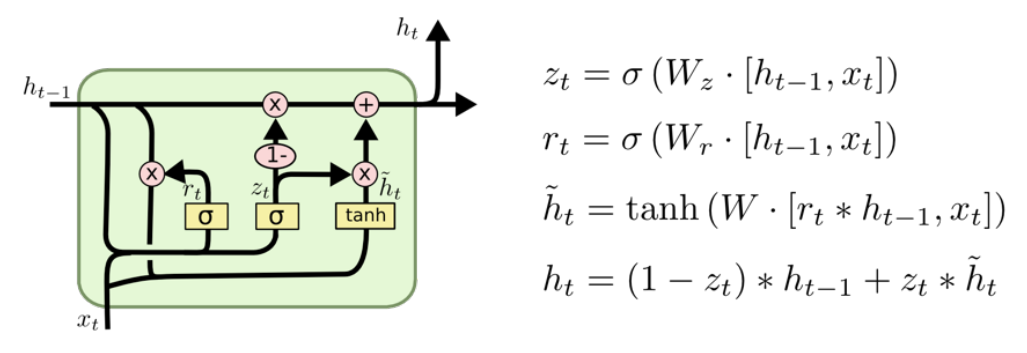
